## Costs



### Preface



There are a few modules you may need to install:



In [1]:
#!pip install -r requirements.txt

All the data required for estimation and calculation can be found
   in a google spreadsheet.  Choose one to explore!



In [1]:
COUNTRY = 'Uganda'

In [2]:
URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/',
       'Tanzania':'https://docs.google.com/spreadsheets/d/1Tknc2F8K6SaA7j0R7J_NE8yJBTsCPPw77_Bfc04MY40/',
       'ICRISAT':'https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo'}
DAYS_PER_PERIOD = {'Uganda':7,'Tanzania':7,'ICRISAT':365.25} # Number of days of expenditure recall

### Estimation



First, we pull in data and estimate CFE demands *given* the prices
    and budgets of households in the data.  (If you&rsquo;ve already done
    the estimation and saved it, skip this step&#x2026;)



In [3]:
import cfe
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(URL[COUNTRY],sheet='Expenditures').set_index(['j','t','m'])
x.columns.name = 'i'
x = x.replace(0,np.nan)
y = np.log(x)

z = read_sheets(URL[COUNTRY],sheet='HH Characteristics').set_index(['j','t','m'])
z.columns.name = 'k'

p = read_sheets(URL[COUNTRY],sheet='Prices').set_index(['t','m'])
p.columns.name = 'i'

r = cfe.Result(y=y,z=z,prices=p)

r.get_alpha()
xhat = r.get_predicted_expenditures()

Missing dependencies for OracleDemands.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for administrative@ligon-ethan.iam.gserviceaccount.com.
Key available for instructors@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for administrative@ligon-ethan.iam.gserviceaccount.com.
Key available for instructors@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for administrative@ligon-ethan.iam.gserviceaccount.com.
Key available for instructors@eep153.iam.gserviceaccount.com.


/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=rhs.append(znil.join(timednil))
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myb,mye=ols(X,lhs.append(ynil),return_se=False,return_v=False,return_e=True)
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=rhs.append(znil.join(timednil))
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myb,mye=ols(X,lhs.appen

/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=rhs.append(znil.join(timednil))
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myb,mye=ols(X,lhs.append(ynil),return_se=False,return_v=False,return_e=True)
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=rhs.append(znil.join(timednil))
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myb,mye=ols(X,lhs.appen

/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=rhs.append(znil.join(timednil))
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myb,mye=ols(X,lhs.append(ynil),return_se=False,return_v=False,return_e=True)
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:447: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=rhs.append(znil.join(timednil))
/home/ligon/anaconda3/lib/python3.8/site-packages/cfe/estimation.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myb,mye=ols(X,lhs.appen

Estimation is kind of expensive, so you might want to save these
 results to use in your later code.



In [4]:
r.to_dataset("my %s.ds" % COUNTRY)

<xarray.Dataset>
Dimensions:           (i: 51, j: 10159, k: 15, kp: 15, m: 1, t: 6)
Coordinates:
  * i                 (i) <U15 'Beans' 'Beef' 'Beer' ... 'Water' 'Wheat (flour)'
  * j                 (j) object '1013000201' '1013000202' ... 'H4301001'
  * t                 (t) object '2005-06' '2009-10' ... '2013-14' '2015-16'
  * m                 (m) object 'Uganda'
  * k                 (k) <U9 'F 00-03' 'M 00-03' ... 'M 51+' 'log HSize'
  * kp                (kp) <U9 'F 00-03' 'M 00-03' ... 'M 51+' 'log HSize'
Data variables: (12/20)
    alpha             (i) float64 6.538 7.501 8.361 6.426 ... 5.816 nan nan
    beta              (i) float64 0.2344 0.3721 0.5759 0.6146 ... 0.462 nan nan
    delta             (k, i) float64 -0.018 -0.02526 -0.01543 ... nan nan
    prices            (i, t, m) float64 600.0 1.25e+03 ... 2.5e+03 2.7e+03
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.946
    loglambdas        (j, t, m) float64 -1.233 0.01116 -0.6326 ... nan -0.4518
    ...                ...
    se_beta           object None
    se_alpha          (i) float64 0.01585 0.01851 0.07667 ... 0.01593 0.0 0.0
    se_a              (i, t, m) float64 0.01585 0.01713 0.0173 ... nan nan nan
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              (i, t, m) float64 6.397 7.131 7.313 ... nan 7.824 7.901
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.946

By the same token, if you&rsquo;ve **already** saved the estimated result, you
 can skip estimation and just  load it&#x2026;



In [1]:
import cfe
r = cfe.from_dataset("my %s.ds" % COUNTRY)

### Ceteris Paribus



We begin by setting up some benchmarks for prices and budgets, so
    the things we don&rsquo;t want to change we can hold fixed.



In [5]:
### First period, first market, and some good.  Change if you wish! ###
my_t = r.coords['t'].data.flatten()[0] # Period 
my_m = r.coords['m'].data.flatten()[0] # Market
my_i = r.coords['i'].data.flatten()[0] # Good
#####################################################################

p = r.prices.sel(t=my_t,m=my_m,drop=True)
phat = p.to_dataframe('i').dropna().squeeze()

ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

def my_prices(p0,p=phat,i=my_i):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

### Nutrient Demands



The nutrient value of food consumed by the household is just the
   product of its diet and a food conversion table.  So let&rsquo;s write a
   function that describes that product:



In [6]:
# Get FCT:
fct = read_sheets(URL[COUNTRY],sheet='FCT').set_index('i')
fct.columns.name='n'

def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

Key available for students@eep153.iam.gserviceaccount.com.
Key available for administrative@ligon-ethan.iam.gserviceaccount.com.
Key available for instructors@eep153.iam.gserviceaccount.com.


### Nutritional requirements



Individuals have nutritional requirements established by nutrition
 scientists.  Here we grab one such set of requirements:



In [7]:
rdi = read_sheets(URL[COUNTRY],
                  sheet='RDI').set_index('n').replace(np.nan,0)
rdi.columns.name = 'k'

rdi = rdi.replace('',0)
rdi

Key available for students@eep153.iam.gserviceaccount.com.
Key available for administrative@ligon-ethan.iam.gserviceaccount.com.
Key available for instructors@eep153.iam.gserviceaccount.com.


k,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


#### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
    can&rsquo;t directly compare household level nutrition with individual
    level requirements.  What we **can** do is add up minimum individual
    requirements, and see whether household total exceed these.  This
    isn&rsquo;t a guarantee that all individuals have adequate nutrition
    (since the way food is allocated in the household might be quite
    unequal, or unrelated to individual requirements), but it is
    *necessary* if all individuals are to have adequate nutrition.

For the average household, the number of different kinds of people
can be computed by averaging over households:



In [8]:
# Find average household characteristics for reference period & place
zbar = r.z.sel(t=my_t,m=my_m,drop=True).mean('j').to_dataframe()

Now, the inner/dot/matrix product between `zbar` and the `rda`
 DataFrame of requirements will give us minimum requirements for the
 average household:



In [9]:
# This matrix product gives minimum nutrient requirements for average
# household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per period:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
hh_rdi

,z
n,
Energy,61649.775785
Protein,1366.551570
Fiber,863.096861
Folate,11449.775785
Calcium,37338.565022
Carbohydrate,4511.233184
Iron,379.840807
Magnesium,9815.201794
Niacin,436.834081


#### Nutritional Adequacy of Food Demands



Since we can trace out demands for nutrients as a function of $(x,p)$,
 and we&rsquo;ve computed minimum nutritional requirements for the average
 household, we can *normalize* nutritional intake to check the adequacy
 of diet.



In [10]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

Maybe select a few nutrients of particular interest&#x2026;



In [17]:
UseNutrients = ['Energy','Protein','Iron','Calcium']

### Simple Policy Experiments



Consider two policies:  First, changing income so that some proportion
 of the population achieves nutritional adequacy.  Here choose quantile
 we&rsquo;re interested in (e.g., a quantile of 0.5 is the median; a quantile
 of 0.25 is the household at the 25th percentage point of the distribution).



In [12]:
# Predicted budgets (sum of all expenditures for each household)
xbar = r.get_predicted_expenditures().sel(t=my_t,m=my_m).sum('i')

# Drop households with /no/ predicted expenditures
xbar = xbar.where(xbar>0)

# A quantile of 0.5 is the median.  Play with quantile value, or just assign.
x0 = xbar.quantile(0.5,'j') # Budget (median household)
#x0 = 50

# Range of budgets to explore
X = np.linspace(x0/10,x0*5,50)

### Compensated Policy Experiments



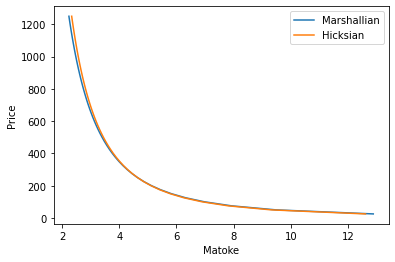

In [14]:
import matplotlib.pyplot as plt

my_i = 'Matoke'
#my_i = 'Gur (Jaggery)'
ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

U0 = r.indirect_utility(x0,p)

plt.plot([r.demands(x0,my_prices(p0,i=my_i))[my_i] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=my_i),type="Hicksian")[my_i] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_i)
#plt.axhline(p.sel(i=my_i).values)
plt.legend(("Marshallian","Hicksian"))

In [18]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = r.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

Examine effects of price changes on *compensated* nutrient adequacy
(i.e., a price increase is accompanied by additional income to keep
utility constant).



Text(0.5, 0, 'Price of Sim sim')

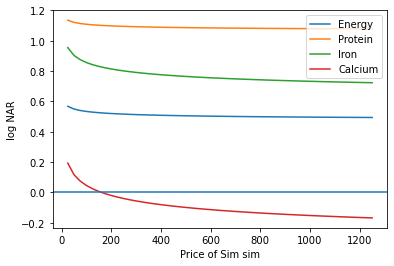

In [24]:
my_i = 'Sim sim'

fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0,i=my_i))[UseNutrients]) for p0 in P])
ax2.legend(UseNutrients)
ax2.axhline(0)
ax2.set_xlabel("Price of %s" % my_i)

In [21]:
fct

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,,,,,,,,,,,,,,,
Beans,1060,65,50,1040,270,191,16.0,2.86,0.49,0.87,0,0.0,0.73,14,7.0
Beef,2910,264,0,50,90,0,27.0,33.50,2.20,0.50,0,18.5,1.70,0,60.0
Beer,430,5,0,60,40,35,0.0,5.10,0.30,0.10,0,0.2,0.50,0,0.0
Bread,2660,76,20,1110,1510,506,37.0,43.85,3.31,4.55,0,0.0,0.84,0,7.0
Bun,2660,76,20,1110,1510,506,37.0,43.85,3.31,4.55,0,0.0,0.84,0,7.0
Cabbages,250,13,30,430,400,58,5.0,2.34,0.40,0.61,50,0.0,1.24,366,2.0
Cassava,1600,14,20,270,160,381,3.0,8.54,0.48,0.87,10,0.0,0.88,206,3.0
Cassava (flour),3140,26,40,360,310,766,19.0,14.00,0.50,3.10,70,0.0,7.00,720,7.0
Chapati,2750,91,20,240,860,557,14.0,21.42,0.97,2.67,0,0.0,0.34,0,8.0


Examine effects of price changes on revenue (if price change due to a
tax or subsidy) and compensating variation.



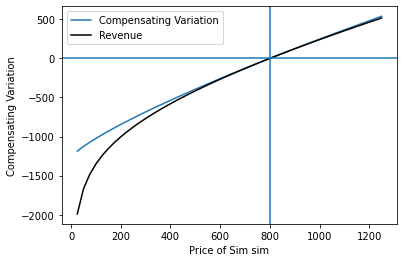

In [25]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,phat,my_prices(p0,i=my_i),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(phat.loc[my_i])

Differences between revenue and compensating variation is deadweight-loss:



Text(0, 0.5, 'Deadweight Loss')

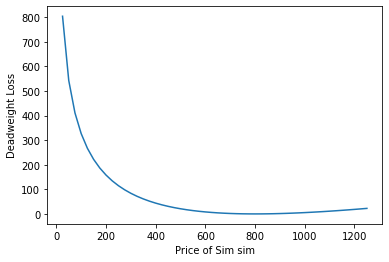

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")